# <div align="center">The Karplus Strong Algorithm</div>
---------------------------------------------------------------------

you can Find me on Github:
> ###### [ GitHub](https://github.com/lev1khachatryan)

 <a id="top"></a> <br>
## Notebook  Content
* [DSP building blocks](#1)


* [Moving averages and simple feedback loops](#2)


* [Generalization](#3)


* [Implementation in Python](#4)

<a id="1"></a> <br>
# <div align="center">DSP building blocks</div>
---------------------------------------------------------------------

[go to top](#top)

### Adder:

<img src='assets/20190910 02/1.png'>

In a diagramatical form we see from -->> to :

<table><tr><td><img src='assets/20190910 02/2.png'></td><td><img src='assets/20190910 02/3.png'></td></tr></table>

### Multiplier:

<img src='assets/20190910 02/4.png'>

In a diagramatical form we see from -->> to :

<table><tr><td><img src='assets/20190910 02/5.png'></td><td><img src='assets/20190910 02/6.png'></td></tr></table>

### Delay:

<img src='assets/20190910 02/7.png'>

In a diagramatical form we see from -->> to :

<img src='assets/20190910 02/8.png'>

### Arbitrary Delay:

<img src='assets/20190910 02/9.png'>

In a diagramatical form we see from -->> to :

<img src='assets/20190910 02/10.png'>

<a id="2"></a> <br>
# <div align="center">Moving averages and simple feedback loops</div>
---------------------------------------------------------------------

[go to top](#top)


### MA(2)

<img src='assets/20190910 02/11.png'>

<img src='assets/20190910 02/12.png'>

### Example 1

<img src='assets/20190910 02/13.png'>

### Example 2

<img src='assets/20190910 02/14.png'>

### Example 3

<img src='assets/20190910 02/15.png'>

### Example 4

<img src='assets/20190910 02/16.png'>


## Reverse the loop

<img src='assets/20190910 02/17.png'>

## A simple model for banking

* constant interest/borrowing rate of 5% per year


* interest accrues on Dec 31


* deposits/withdrawals during year n: x[n]


* balance at year n: ***y[n] = 1.05 y[n-1] + x[n]***

<img src='assets/20190910 02/18.png'>

# Example: the one time investment

<img src='assets/20190910 02/19.png'>

# Example: the saver

<img src='assets/20190910 02/20.png'>

# Example: the independently wealthy

<img src='assets/20190910 02/21.png'>

<a id="3"></a> <br>
# <div align="center">Generalization</div>
---------------------------------------------------------------------

[go to top](#top)


<img src='assets/20190910 02/22.png'>

## Example

<img src='assets/20190910 02/23.png'>

## Example

<img src='assets/20190910 02/24.png'>

<img src='assets/20190910 02/25.png'>

## Example: Playing a sine wave

<img src='assets/20190910 02/26.png'>

<table><tr><td><img src='assets/20190910 02/27.png'></td><td><img src='assets/20190910 02/28.png'></td></tr></table>

<img src='assets/20190910 02/29.png'>

<img src='assets/20190910 02/30.png'>

<img src='assets/20190910 02/31.png'>

<a id="4"></a> <br>
# <div align="center">Implementation In Python</div>
---------------------------------------------------------------------

[go to top](#top)

In [2]:
## Math
import numpy as np

## nd.array deep copy
import copy

## Audio Playing
from IPython.display import Audio

## Visualization
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def karplus_strong(wavetable, n_samples):
    """
    Synthesizes a new waveform from an existing wavetable, modifies last sample by averaging.
    
    Parameters:
    wavetable (list or nd.array) - initially generated signal
    n_samples (int) - number of samples from wavetable
    
    Return:
    np.array - transformed n_sample size wavetable
    
    """
    wavetable = copy.deepcopy(wavetable)
    samples = []
    current_sample = 0
    previous_value = 0
    while len(samples) < n_samples:
        wavetable[current_sample] = 0.5 * (wavetable[current_sample] + previous_value)
        samples.append(wavetable[current_sample])
        previous_value = samples[-1]
        current_sample += 1
        current_sample = current_sample % wavetable.size
    return np.array(samples)

In [3]:
# Frequency
fs = 8000

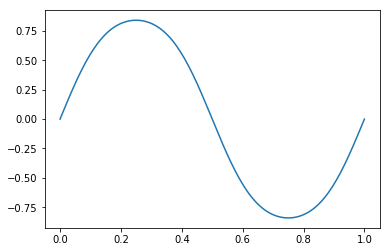

In [4]:
wavetable_size = fs // 55
t = np.linspace(0, 1, num=wavetable_size)
wavetable = np.sin(np.sin(2 * np.pi * t))
plt.plot(t, wavetable);
# plt.plot(t, wavetable, '-o')andint(0, 2, wavetable_size) - 1).astype(np.float)

In [5]:
sample1 = karplus_strong(wavetable, 2 * fs)

In [6]:
Audio(sample1, rate=fs)

(0, 1000)

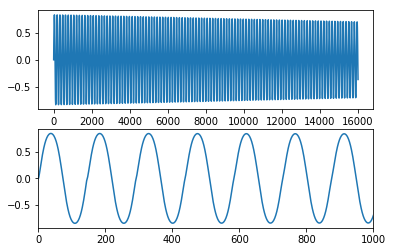

In [7]:
plt.subplot(211)
plt.plot(sample1)
plt.subplot(212)
plt.plot(sample1)
plt.xlim(0, 1000)

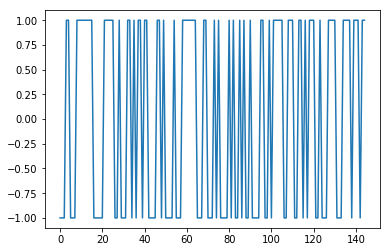

In [8]:
wavetable_size = fs // 55 
wavetable = (2 * np.random.randint(0, 2, wavetable_size) - 1).astype(np.float)
plt.plot(wavetable)

In [9]:
sample2 = karplus_strong(wavetable, 2 * fs)

In [10]:
Audio(sample2, rate=fs)

(500, 1000)

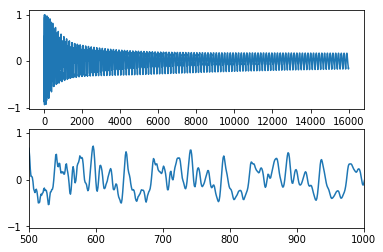

In [11]:
plt.subplot(211)
plt.plot(sample2)
plt.subplot(212)
plt.plot(sample2)
plt.xlim(500, 1000)

In [83]:
def generalization(timbre, decay, pitch):
    """
    Synthesizes a new waveform from an existing wavetable, modifies last sample by averaging.
    
    Parameters:
    timbre (list or nd.array) - initially generated signal
    decay (float) - alpha, which can be any number, but we consider it from 0 to 1, controls envelop
    pitch (int) - M, controls frequency
    
    Return:
    np.array - transformed timbre by y[n] = x[n] + alpha*y[n-M]
    
    """
    timbre = copy.deepcopy(timbre)
    transformed = []
    current_sample = 0
    while current_sample < len(timbre):
        if current_sample < pitch:
            transformed.insert(current_sample, timbre[current_sample])
        else:
            transformed.insert(current_sample, timbre[current_sample] + decay * transformed[current_sample-pitch])
        current_sample += 1
    return np.array(transformed)

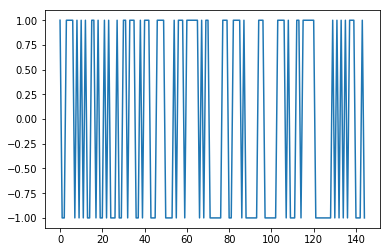

In [79]:
fs = 8000

wavetable_size = fs // 55 
wavetable = (2 * np.random.randint(0, 2, wavetable_size) - 1).astype(np.float)
plt.plot(wavetable)

# wavetable_size = fs // 55
# t = np.linspace(0, 1, num=wavetable_size)
# wavetable = np.sin(np.sin(2 * np.pi * t))
# plt.plot(t, wavetable);
# # plt.plot(t, wavetable, '-o')andint(0, 2, wavetable_size) - 1).astype(np.float)

In [80]:
sample2 = generalization(wavetable, 0.6, 3)

In [73]:
# %debug

In [81]:
Audio(sample2, rate=fs)

In [76]:
# sample2

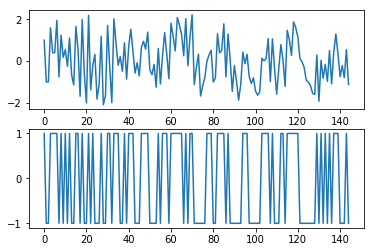

In [82]:
plt.subplot(211)
plt.plot(sample2)
plt.subplot(212)
plt.plot(wavetable)
# plt.xlim(500, 1000)